<a href="https://colab.research.google.com/github/Sourav15-4588/Game_of_Datathon_Bitfest2025/blob/main/LGB_bitfest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [ ]:
sub=pd.read_csv('/content/sample_submission.csv')
sub

,id,Status_C,Status_CL,Status_D
0,15000,0.628084,0.034788,0.337128
1,15001,0.628084,0.034788,0.337128
2,15002,0.628084,0.034788,0.337128
3,15003,0.628084,0.034788,0.337128
4,15004,0.628084,0.034788,0.337128
...,...,...,...,...
9995,24995,0.628084,0.034788,0.337128
9996,24996,0.628084,0.034788,0.337128
9997,24997,0.628084,0.034788,0.337128
9998,24998,0.628084,0.034788,0.337128


In [ ]:
train=pd.read_csv('/content/train.csv')
train

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,1092.0,NaN,14610.0,F,NaN,NaN,NaN,N,1.8,NaN,3.65,NaN,NaN,NaN,NaN,269.0,10.5,3.0,C
1,1,1783.0,Placebo,22646.0,F,N,N,N,N,0.5,328.0,3.80,14.0,1044.0,85.25,108.0,271.0,10.3,2.0,C
2,2,130.0,Placebo,13918.0,F,Y,Y,Y,Y,5.6,NaN,3.07,182.0,1029.0,119.35,NaN,399.0,11.7,4.0,D
3,3,1725.0,Placebo,11462.0,F,N,Y,N,N,0.6,376.0,3.26,45.0,794.0,82.15,154.0,293.0,10.7,4.0,C
4,4,2812.0,NaN,18628.0,F,NaN,NaN,NaN,N,0.7,NaN,3.40,NaN,NaN,NaN,NaN,166.0,9.9,1.0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,943.0,Placebo,22836.0,F,N,N,N,N,0.6,235.0,3.35,65.0,663.0,51.15,67.0,223.0,10.6,3.0,D
14996,14996,662.0,Placebo,17046.0,F,N,Y,Y,N,0.9,NaN,2.84,161.0,601.0,181.35,NaN,228.0,11.0,3.0,D
14997,14997,2272.0,Placebo,22514.0,F,N,N,N,N,0.7,127.0,3.80,15.0,423.0,49.60,105.0,514.0,10.0,2.0,C
14998,14998,1367.0,NaN,23376.0,F,NaN,NaN,NaN,N,3.7,NaN,2.93,NaN,NaN,NaN,NaN,120.0,10.6,4.0,D


In [ ]:
test=pd.read_csv('/content/test.csv')
test

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,15000,3492.0,NaN,21185.0,F,NaN,NaN,NaN,N,0.7,NaN,3.14,NaN,NaN,NaN,NaN,269.0,10.6,2.0
1,15001,1654.0,NaN,19724.0,M,NaN,NaN,NaN,N,0.6,NaN,3.48,NaN,NaN,NaN,NaN,306.0,11.1,3.0
2,15002,890.0,Placebo,24621.0,M,N,Y,N,N,4.0,244.0,3.02,177.0,960.0,86.0,91.0,360.0,11.0,4.0
3,15003,1086.0,NaN,18628.0,F,NaN,NaN,NaN,N,0.6,NaN,3.33,NaN,NaN,NaN,NaN,246.0,10.6,3.0
4,15004,4453.0,Placebo,20449.0,F,N,Y,N,N,0.9,132.0,3.60,43.0,663.0,52.7,56.0,344.0,10.6,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,24995,3239.0,D-penicillamine,24621.0,F,N,Y,Y,N,0.8,NaN,3.51,4.0,6456.2,57.0,NaN,233.0,11.1,4.0
9996,24996,2644.0,D-penicillamine,20296.0,F,N,N,N,N,0.6,NaN,3.87,31.0,663.0,74.4,NaN,295.0,11.0,3.0
9997,24997,1367.0,NaN,23376.0,F,NaN,NaN,NaN,N,0.8,NaN,3.63,NaN,NaN,NaN,NaN,371.0,11.1,3.0
9998,24998,939.0,NaN,22646.0,F,NaN,NaN,NaN,S,0.7,NaN,3.40,NaN,NaN,NaN,NaN,223.0,9.6,3.0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15000 non-null  int64  
 1   N_Days         14999 non-null  float64
 2   Drug           8522 non-null   object 
 3   Age            15000 non-null  float64
 4   Sex            15000 non-null  object 
 5   Ascites        8534 non-null   object 
 6   Hepatomegaly   8526 non-null   object 
 7   Spiders        8513 non-null   object 
 8   Edema          15000 non-null  object 
 9   Bilirubin      15000 non-null  float64
 10  Cholesterol    6639 non-null   float64
 11  Albumin        15000 non-null  float64
 12  Copper         8415 non-null   float64
 13  Alk_Phos       8517 non-null   float64
 14  SGOT           8513 non-null   float64
 15  Tryglicerides  6586 non-null   float64
 16  Platelets      14393 non-null  float64
 17  Prothrombin    14980 non-null  float64
 18  Stage 

<Axes: >

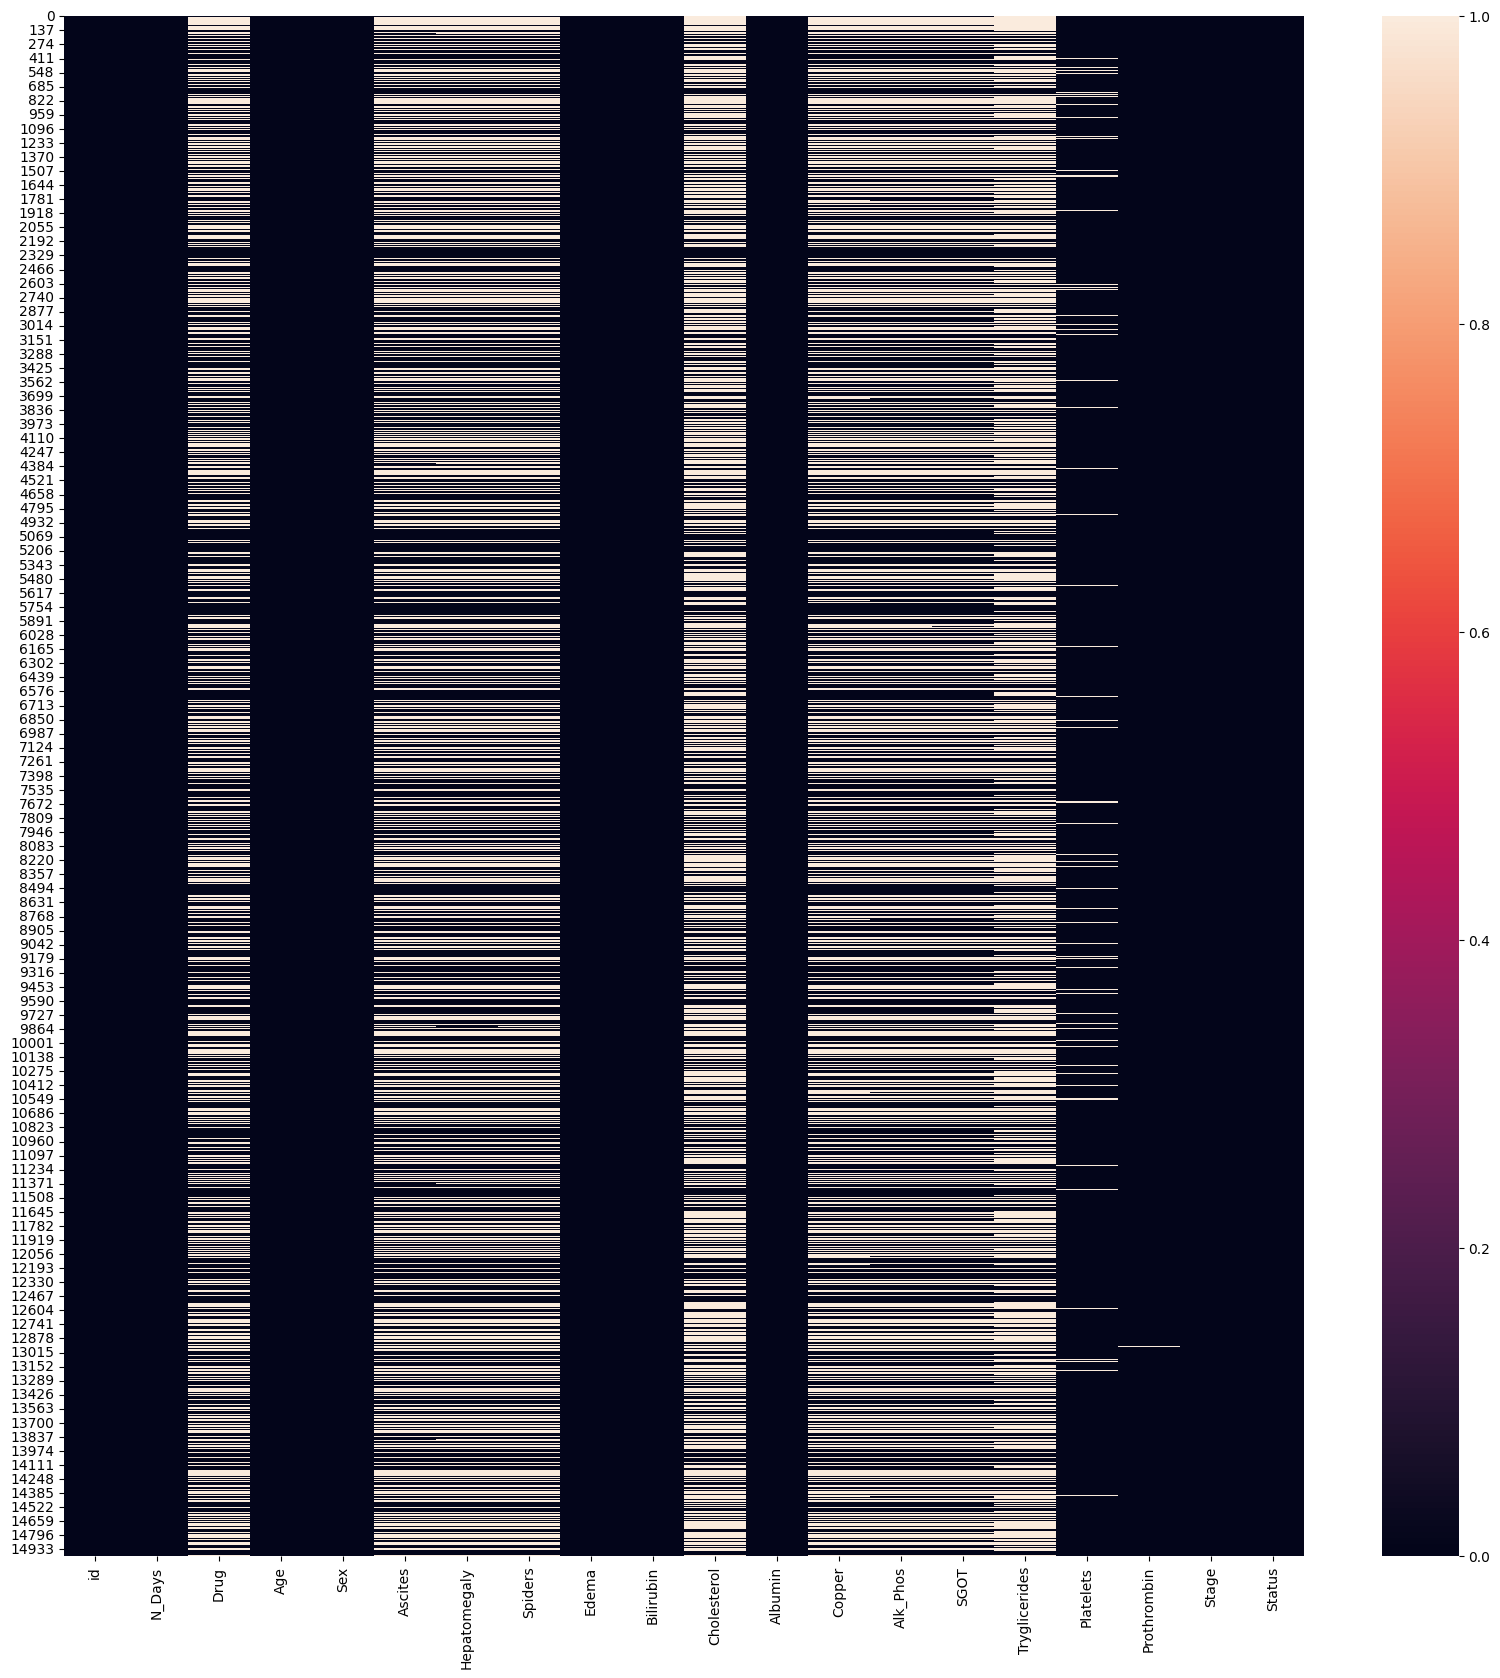

In [ ]:
plt.figure(figsize=(20,20))
sb.heatmap(train.isnull())

In [ ]:
null_percentage = train.isnull().sum() * 100 / len(train)
print(null_percentage)

id                0.000000
N_Days            0.006667
Drug             43.186667
Age               0.000000
Sex               0.000000
Ascites          43.106667
Hepatomegaly     43.160000
Spiders          43.246667
Edema             0.000000
Bilirubin         0.000000
Cholesterol      55.740000
Albumin           0.000000
Copper           43.900000
Alk_Phos         43.220000
SGOT             43.246667
Tryglicerides    56.093333
Platelets         4.046667
Prothrombin       0.133333
Stage             0.000000
Status            0.000000
dtype: float64


In [ ]:
print("Columns in train:", train.columns)
print("Columns in test:", test.columns)

Columns in train: Index(['id', 'N_Days', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly',
       'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage', 'Status'],
      dtype='object')
Columns in test: Index(['id', 'N_Days', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly',
       'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage'],
      dtype='object')


In [ ]:
print("Unique values in 'Drug' (train):", train['Drug'].nunique())
print("Unique values in 'Drug' (test):", test['Drug'].nunique())

Unique values in 'Drug' (train): 2
Unique values in 'Drug' (test): 3


In [ ]:
# Loop through all columns in the dataset
multi_class_columns = []

for col in train.columns:
    if train[col].dtype == 'object':  # Only check categorical columns
        unique_classes = train[col].nunique()
        if unique_classes > 2:  # More than two unique classes -> Multi-class column
            multi_class_columns.append((col, unique_classes))

# Output the multi-class columns and their unique class count
print("Multi-class columns and their unique class count:")
for col, unique_classes in multi_class_columns:
    print(f"Column '{col}' has {unique_classes} unique classes.")

Multi-class columns and their unique class count:
Column 'Edema' has 3 unique classes.
Column 'Status' has 3 unique classes.


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder for other object columns (like Gender, Treatment)
label_encoder = LabelEncoder()

# Apply One-Hot Encoding for 'Edema' column in both train and test datasets
train_encoded = train.copy()
test_encoded = test.copy()

# One-Hot Encoding for 'Edema' columns in train and test datasets
train_encoded['Edema'] = train_encoded['Edema'].map({'N': 0, 'Y': 1, 'S': 2})
test_encoded['Edema'] = test_encoded['Edema'].map({'N': 0, 'Y': 1, 'S': 2})

# Combine train and test data to fit LabelEncoder on both sets for other categorical columns
combined = pd.concat([train_encoded, test_encoded])

# Apply Label Encoding for other object columns (like Gender, Treatment) in train dataset
for column in combined.select_dtypes(include=['object']).columns:
    if column not in ['Status', 'Edema']:  # Exclude the target column and already encoded columns
        # Fit label encoder on the combined data
        label_encoder.fit(combined[column])

        # Apply the transformation to both train and test datasets
        train_encoded[column] = label_encoder.transform(train_encoded[column])
        test_encoded[column] = label_encoder.transform(test_encoded[column])

In [ ]:
# Create a LabelEncoder object
le = LabelEncoder()

# Iterate over all columns in the training dataset
for col in train.columns:
    # Check if the column is of object type (likely categorical)
    if train[col].dtype == 'object':
        # Fit and transform the column using Label Encoding
        train[col] = le.fit_transform(train[col])

# Iterate over all columns in the testing dataset
for col in test.columns:
    # Check if the column is of object type (likely categorical)
    if test[col].dtype == 'object':
        # Fit and transform the column using Label Encoding
        test[col] = le.fit_transform(test[col])

In [ ]:
null_percentage = train.isnull().sum() * 100 / len(train)
print(null_percentage)

id                0.000000
N_Days            0.006667
Drug              0.000000
Age               0.000000
Sex               0.000000
Ascites           0.000000
Hepatomegaly      0.000000
Spiders           0.000000
Edema             0.000000
Bilirubin         0.000000
Cholesterol      55.740000
Albumin           0.000000
Copper           43.900000
Alk_Phos         43.220000
SGOT             43.246667
Tryglicerides    56.093333
Platelets         4.046667
Prothrombin       0.133333
Stage             0.000000
Status            0.000000
dtype: float64


In [ ]:
train.describe()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
count,15000.000000,14999.00000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,6639.000000,15000.000000,8415.000000,8517.000000,8513.000000,6586.000000,14393.000000,14980.000000,15000.000000,15000.000000
mean,7499.500000,1993.29762,1.128000,19270.089200,0.039333,0.888867,1.124933,0.982200,0.102267,1.881587,324.905859,3.528998,75.238503,1632.297804,105.573757,110.422563,254.289849,10.621692,3.025667,0.614867
std,4330.271354,1344.45261,0.848173,3697.696134,0.194393,0.980296,0.850121,0.939402,0.380111,2.797765,172.066105,0.375575,75.338200,1809.175515,50.154406,52.144922,97.531068,0.738922,0.883550,0.910345
min,0.000000,10.00000,0.000000,394.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.300000,53.000000,1.960000,1.000000,10.600000,26.350000,33.000000,0.800000,9.000000,1.000000,0.000000
25%,3749.750000,1097.00000,0.000000,16463.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.600000,239.000000,3.290000,31.000000,721.000000,70.000000,79.000000,183.000000,10.100000,2.000000,0.000000
50%,7499.500000,1786.00000,1.000000,19577.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.900000,280.000000,3.580000,52.000000,1065.000000,97.650000,99.000000,249.000000,10.600000,3.000000,0.000000
75%,11249.250000,2644.00000,2.000000,22369.000000,0.000000,2.000000,2.000000,2.000000,0.000000,1.800000,360.000000,3.770000,88.000000,1649.000000,130.200000,131.000000,312.000000,11.000000,4.000000,2.000000
max,14999.000000,25568.00000,2.000000,34307.000000,1.000000,2.000000,2.000000,2.000000,2.000000,28.000000,2622.000000,5.200000,642.000000,19120.000000,601.450000,1500.000000,3574.000000,18.000000,4.000000,2.000000


In [ ]:
# Fill missing values in train dataset with the mean of each column (for numerical columns only)
for col in train.columns:
    # Check if the column is numeric and has missing values
    if pd.api.types.is_numeric_dtype(train[col]) and train[col].isnull().any():
        mean_val = train[col].mean()
        train[col].fillna(mean_val, inplace=True)

# Fill missing values in test dataset with the mean of each column (for numerical columns only)
for col in test.columns:
    # Check if the column is numeric and has missing values
    if pd.api.types.is_numeric_dtype(test[col]) and test[col].isnull().any():
        mean_val = test[col].mean()
        test[col].fillna(mean_val, inplace=True)

<ipython-input-19-1e91fc113a16>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train[col].fillna(mean_val, inplace=True)
<ipython-input-19-1e91fc113a16>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.

In [ ]:
train.shape

(15000, 20)

In [ ]:
null_percentage = train.isnull().sum() * 100 / len(train)
print(null_percentage)

id               0.0
N_Days           0.0
Drug             0.0
Age              0.0
Sex              0.0
Ascites          0.0
Hepatomegaly     0.0
Spiders          0.0
Edema            0.0
Bilirubin        0.0
Cholesterol      0.0
Albumin          0.0
Copper           0.0
Alk_Phos         0.0
SGOT             0.0
Tryglicerides    0.0
Platelets        0.0
Prothrombin      0.0
Stage            0.0
Status           0.0
dtype: float64


In [ ]:
import seaborn as sns

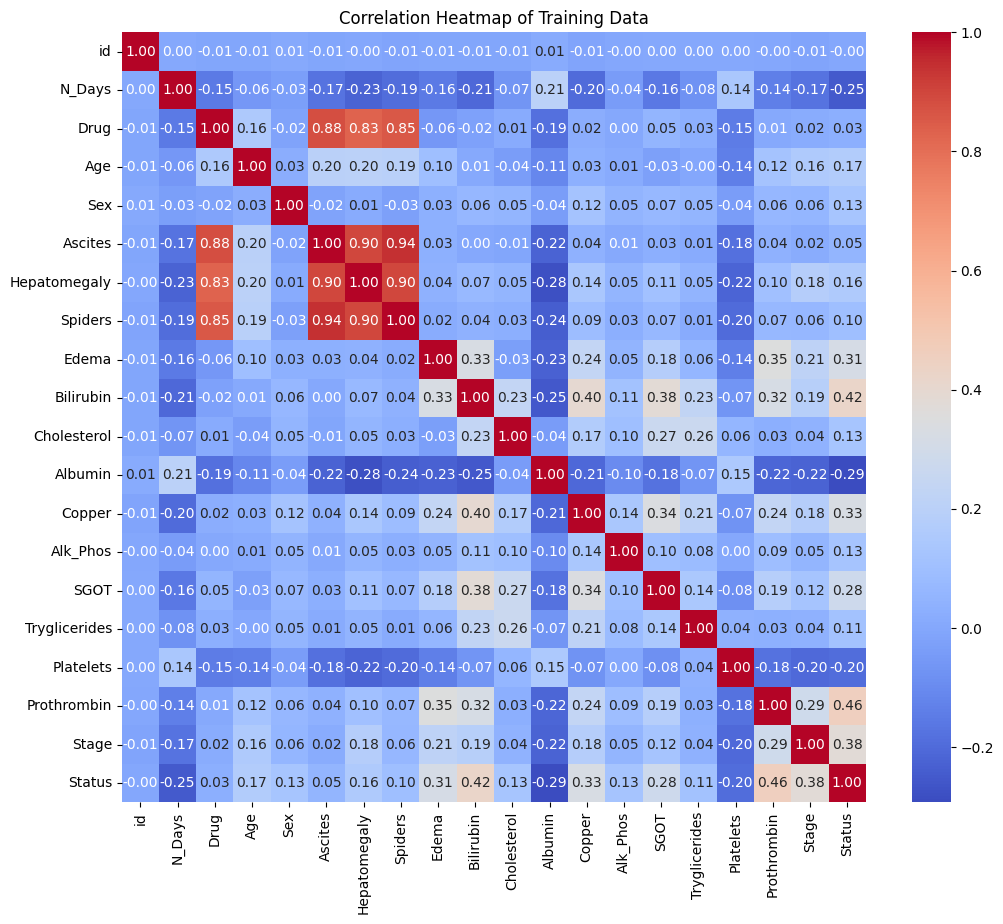

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(train.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Training Data')
plt.show()

In [ ]:
# Drop 'Cholesterol' and 'Tryglicerides' columns
#train = train.drop(['Drug','Sex','Ascites','Spiders','Platelets','Cholesterol','Tryglicerides','Alk_Phos'], axis=1)
#test = test.drop(['Drug','Sex','Ascites','Spiders','Platelets','Cholesterol','Tryglicerides','Alk_Phos'], axis=1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# List of features to normalize (excluding 'id')
features_to_normalize = [
    'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
    'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets',
    'Prothrombin', 'Age', 'N_Days'
]

# Fit the scaler on the train set and transform both train and test sets
train[features_to_normalize] = scaler.fit_transform(train[features_to_normalize])
test[features_to_normalize] = scaler.transform(test[features_to_normalize])

In [ ]:
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore

# List of numerical features to check for outliers
features_to_check = [
    'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
    'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets',
    'Prothrombin', 'Age', 'N_Days'
]

# Scale the numerical features in the training set before outlier detection
scaler = StandardScaler()
train[features_to_check] = scaler.fit_transform(train[features_to_check])

# Calculate Z-scores for the features
z_scores = np.abs(zscore(train[features_to_check]))

# Identify outliers (where Z-score > 3)
outliers = (z_scores > 3)

# Replace outliers with the mean of each feature
for feature in features_to_check:
    feature_mean = train[feature].mean()
    # Use Pandas .loc for indexing based on boolean DataFrame
    train.loc[outliers[feature], feature] = feature_mean

# Scale the test set using the same scaler
test[features_to_check] = scaler.transform(test[features_to_check])

In [ ]:
train.shape

(15000, 20)

In [ ]:
test.shape

(10000, 19)

In [ ]:
train.isnull().sum()

,0
id,0
N_Days,0
Drug,0
Age,0
Sex,0
Ascites,0
Hepatomegaly,0
Spiders,0
Edema,0
Bilirubin,0


In [ ]:
x=train.drop('Status', axis=1)
x

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,0,-0.670427,2,-1.260310,0,2,2,2,0,-0.029162,0.000000,0.322189,-1.576549e-16,-1.945425e-16,0.000000,-2.946294e-16,0.153978,-0.164804,3.0
1,1,-0.156429,1,0.913007,0,0,0,0,0,-0.493835,0.027032,0.721590,-1.085310e+00,-4.315631e-01,-0.537929,-7.011821e-02,0.174913,-0.435658,2.0
2,2,-1.386008,1,-1.447460,0,1,1,1,2,1.329110,0.000000,-1.222163,1.892099e+00,-4.425668e-01,0.364629,-2.946294e-16,1.514750,1.460321,4.0
3,3,-0.199572,1,-2.111680,0,0,1,0,0,-0.458091,0.446378,-0.716254,-5.359070e-01,-6.149580e-01,-0.619979,1.261297e+00,0.405198,0.106050,4.0
4,4,0.608989,2,-0.173652,0,2,2,2,0,-0.422346,0.000000,-0.343480,-1.576549e-16,-1.945425e-16,0.000000,-2.946294e-16,-0.924172,-0.977367,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,-0.781260,1,0.964392,0,0,0,0,0,-0.458091,-0.785452,-0.476614,-1.814536e-01,-7.110569e-01,-1.440487,-1.256814e+00,-0.327526,-0.029377,3.0
14996,14996,-0.990281,1,-0.601500,0,0,1,1,0,-0.350858,0.000000,-1.834578,1.519923e+00,-7.565388e-01,2.005644,-2.946294e-16,-0.275188,0.512331,3.0
14997,14997,0.207312,1,0.877308,0,0,0,0,0,-0.422346,-1.728981,0.721590,-1.067587e+00,-8.871159e-01,-1.481512,-1.569496e-01,2.718510,-0.841940,2.0
14998,14998,-0.465869,2,1.110434,0,2,2,2,0,0.649974,0.000000,-1.594937,-1.576549e-16,-1.945425e-16,0.000000,-2.946294e-16,-1.405676,-0.029377,4.0


In [ ]:
y=train['Status']
y

,Status
0,0
1,0
2,2
3,0
4,0
...,...
14995,2
14996,2
14997,0
14998,2


In [ ]:
unique_statuses = y.unique()
unique_statuses

array([0, 2, 1])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001000 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2124
[LightGBM] [Info] Number of data points in the train set: 12000, number of used features: 19
[LightGBM] [Info] Start training from score -0.384193
[LightGBM] [Info] Start training from score -3.797951
[LightGBM] [Info] Start training from score -1.215427
LightGBM train: 93.675
LightGBM test: 85.66666666666667
              precision    recall  f1-score   support

           0       0.87      0.94      0.91      2044
           1       0.58      0.14      0.23        76
           2       0.83      0.71      0.77       880

    accuracy                           0.86      3000
   macro avg       0.76      0.60      0.63      3000
weighted avg       0.85      0.86      0.85      3000

Confusion Matrix:
 [[1931    3  110]
 [  42   11

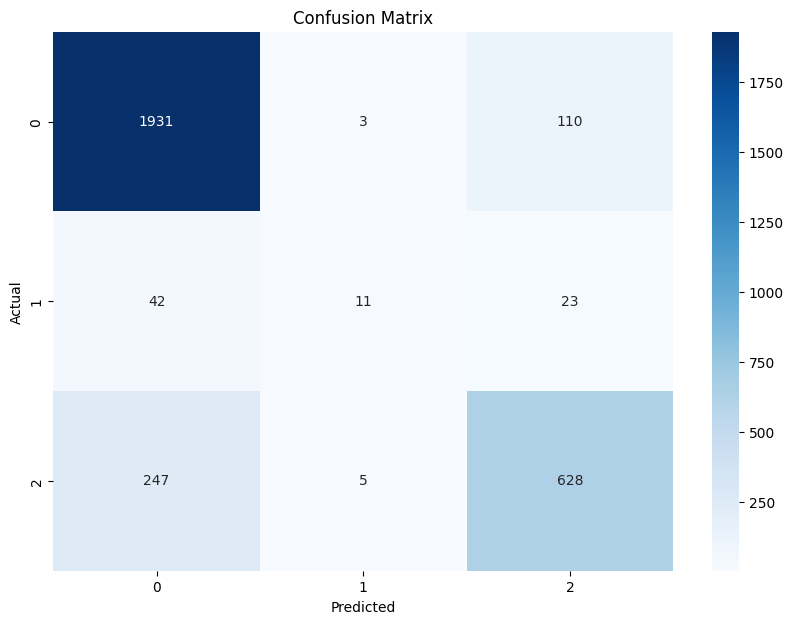

In [ ]:
from lightgbm import LGBMClassifier

# Initialize model
lgb = LGBMClassifier(random_state=42)
lgb.fit(x_train, y_train)

# Predictions and accuracy
x_train_pred_lgb = lgb.predict(x_train)
train_pred_lgb = accuracy_score(x_train_pred_lgb, y_train)
print('LightGBM train:', train_pred_lgb * 100)

x_test_pred_lgb = lgb.predict(x_test)
test_pred_lgb = accuracy_score(x_test_pred_lgb, y_test)
print('LightGBM test:', test_pred_lgb * 100)

y_pred_lgb = lgb.predict(x_test)
print(classification_report(y_test, y_pred_lgb))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, x_test_pred_lgb)
print("Confusion Matrix:\n", conf_matrix)

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()